In [61]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [67]:
d_s = np.array([ml.PQ(3.9*u.mm, sigma=0.05*u.mm), ml.PQ(5.20*u.mm, sigma=0.05*u.mm)])
r_s = d_s/2
Re_laminar = ml.PQ(1000, is_const=True)
a_approx = 0.2*r_s*Re_laminar # Примерное расстояние, с которого начнётся ламинарное течение
g = ml.PQ(9.815*u.m/u.s**2, is_const=True)
ro = ml.PQ(1.2047*u.kg/u.m**3, is_const=True)
manom_coef = 9.80665*u.pascal
k = 0.2 # Коэффициент наклона трубки ММН

In [73]:
data = pd.read_csv('lab1.3.3.csv')
data

,delta_P,delta_V,delta_T,delta_l,delta_P.1,delta_V.1,delta_T.1,delta_l.1
0,10,0.5,35.00,11.2,10.0,1.0,26.25,11.5
1,20,1.0,37.00,30.0,15.0,1.0,16.84,30.0
2,30,1.0,25.00,40.0,20.0,1.0,12.87,40.0
3,40,1.0,18.50,50.0,25.0,1.0,10.00,50.0
4,50,1.0,14.62,NaN,30.0,1.0,8.57,NaN
5,60,1.0,12.69,NaN,35.0,1.0,7.46,NaN
6,70,1.0,10.91,NaN,40.0,2.0,14.28,NaN
7,80,1.0,9.87,NaN,53.0,2.0,13.13,NaN
8,93,2.0,19.34,NaN,73.0,2.0,11.97,NaN
9,105,2.0,19.14,NaN,93.0,2.0,10.56,NaN


In [74]:
# Деления
#80 +-2, далее +-3, начиная с 220 +-1
# 40 +- 2, 130 и далее +-1
ticks_s = [np.array([ml.PQ(val, sigma=0.5) for val in data['delta_P'].dropna().astype(float)]),
           np.array([ml.PQ(val, sigma=0.5) for val in data['delta_P.1'].dropna().astype(float)])]
dP_s = [ml.repr_ndarray_as(ticks*manom_coef*k, u.pascal) for ticks in ticks_s]
#print('P:', dP_s)
dV_s = [np.array([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) 
                  for val in data['delta_V'].dropna().astype(float)]),
        np.array([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) 
                  for val in data['delta_V.1'].dropna().astype(float)])]
#print('dV', dV_s)
dT_s = [np.array([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) 
                  for val in data['delta_T'].dropna().astype(float)]),
        np.array([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) 
                  for val in data['delta_T.1'].dropna().astype(float)])]
#print('dT', dT_s)
Q_s = [dV/dT for (dV, dT) in zip(dV_s, dT_s)]
#print('Q', Q_s)

delta_l_s = [np.array([ml.PQ(val*u.cm, sigma=0.5*u.cm) for val in data['delta_l'].dropna().astype(float)]),
             np.array([ml.PQ(val*u.cm, sigma=0.5*u.cm) for val in data['delta_l.1'].dropna().astype(float)])]
l_s = [np.cumsum(delta_l) for delta_l in delta_l_s]
#print(l_s)

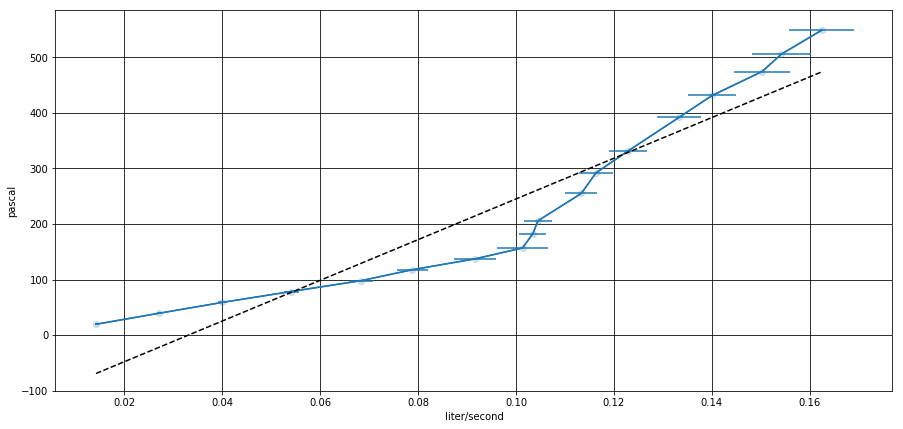

k 3663.95681511
eta 0.000042±0.000002 pascal*second (0.052248)
                                            Q  \
0   0.014286±0.000351 liter/second (0.024578)   
1   0.027027±0.000454 liter/second (0.016811)   
2   0.040000±0.000894 liter/second (0.022361)   
3   0.054054±0.001558 liter/second (0.028818)   
4   0.068399±0.002437 liter/second (0.035632)   
5   0.078802±0.003203 liter/second (0.040650)   
6   0.091659±0.004300 liter/second (0.046908)   
7   0.101317±0.005232 liter/second (0.051636)   
8   0.103413±0.002723 liter/second (0.026332)   
9   0.104493±0.002779 liter/second (0.026597)   
10  0.113314±0.003260 liter/second (0.028766)   
11  0.116347±0.003434 liter/second (0.029513)   
12  0.122850±0.003823 liter/second (0.031117)   
13  0.133333±0.004494 liter/second (0.033706)   
14  0.140056±0.004954 liter/second (0.035369)   
15  0.150263±0.005695 liter/second (0.037897)   
16  0.154202±0.005994 liter/second (0.038873)   
17  0.162470±0.006649 liter/second (0.040924)   

     

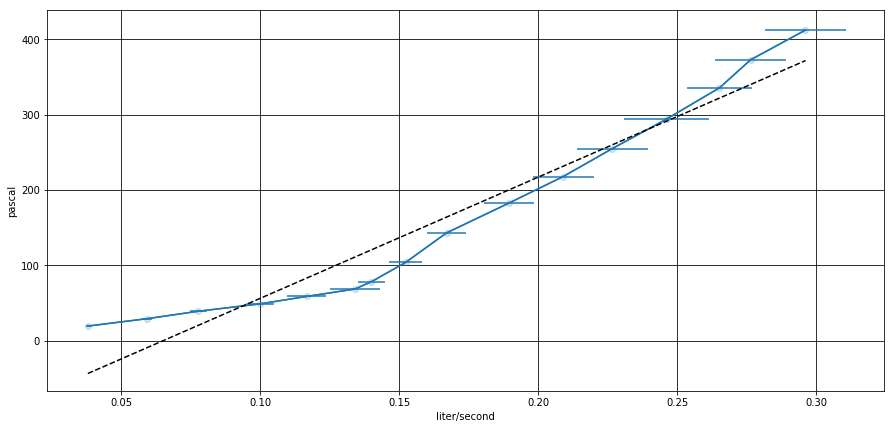

k 1606.47704542
eta 0.000058±0.000002 pascal*second (0.039740)
                                            Q  \
0   0.038095±0.000820 liter/second (0.021513)   
1   0.059382±0.001860 liter/second (0.031330)   
2   0.077700±0.003117 liter/second (0.040116)   
3   0.100000±0.005099 liter/second (0.050990)   
4   0.116686±0.006907 liter/second (0.059194)   
5   0.134048±0.009084 liter/second (0.067766)   
6   0.140056±0.004954 liter/second (0.035369)   
7   0.152323±0.005850 liter/second (0.038408)   
8   0.167084±0.007029 liter/second (0.042069)   
9   0.189394±0.009017 liter/second (0.047612)   
10  0.208986±0.010969 liter/second (0.052485)   
11  0.226757±0.012905 liter/second (0.056909)   
12  0.246305±0.015217 liter/second (0.061779)   
13  0.265252±0.011760 liter/second (0.044334)   
14  0.276498±0.012775 liter/second (0.046203)   
15  0.296150±0.014651 liter/second (0.049471)   

                                       dP  \
0    19.613300±0.980665 pascal (0.050000)   
1    29.41995

In [75]:
for Q, dP, dV, dT, r, lens in zip(Q_s, dP_s, dV_s, dT_s, r_s, delta_l_s):
    new_data = pd.DataFrame({
        'dP':dP,
        'dV':dV,
        'dT':dT,
        'Q':Q
    })
    l = lens[3]
    plt.figure(figsize=(15, 7))
    ml.plt_pq(Q, dP, ols=True)
    plt.show()
    
    ols_coefs, ols_errors = ml.OLS(Q, dP)
    print('k', ols_coefs[0])

    eta = ml.eval(u.pascal*u.s, lambda r, l, coef:np.pi*r**4/(8*l)*coef*(u.pascal*u.s)/u.liters, r, l, ols_coefs[0])
    print('eta', eta)
    print(new_data)
# Тут смотрим, когда кончается прямая, и отрезаем ненужное

In [ ]:
# Для переходной области 
i_border = 5
Re = Q[i_border]*ro/(np.pi*r*eta)
print(Re)

calculated_radius = [8*l*eta/(np.pi*ols_coefs[0])/(u.pascal*u.s)*u.liter]
all_r_s = [r]

In [ ]:
# 6. Для гарантированно ламинарного течения измеряем распределение давления вдоль трубки.

In [ ]:
Q_exper_s = [ml.PQ(1*u.l/(16.40*u.s), sigma=0.01), ml.PQ(1*u.l/(12.03*u.s), sigma=0.01)]
ticks_s = [np.array([ml.PQ(val, sigma=0.5) for val in 
                     [31, 62, 106, 153]]),
           np.array([ml.PQ(val, sigma=0.5) for val in 
                     [20, 34, 51, 71]])]
P_s = [ml.repr_ndarray_as(ticks*manom_coef*k, u.pascal) for ticks in ticks_s]
print('P:', P_s)


In [ ]:
for delta_l, l, P in zip(delta_l_s, l_s, P_s):
    delta_P = np.array([ml.PQ(0.00001*u.pascals, sigma=0.1*u.pascal, dim=u.pascal)]+list(P[1:]-P[:-1]))
    print(delta_P)
    ml.plt_pq(delta_l, delta_P)
    plt.show()
    #ml.plt_pq(delta_l, dP)
    #plt.show()
    ml.plt_pq(l, P)
    plt.show()